In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20)

In [2]:
%run get_data_ratios.py

get_data_ratios.py:94: RuntimeWarning: divide by zero encountered in divide
  bdec = Halpha/Hbeta
get_data_ratios.py:94: RuntimeWarning: invalid value encountered in divide
  bdec = Halpha/Hbeta
get_data_ratios.py:98: RuntimeWarning: divide by zero encountered in divide
  bdec_frac_err = np.sqrt((Halpha_err/Halpha)**2 + (Hbeta_err/Hbeta)**2)
get_data_ratios.py:98: RuntimeWarning: invalid value encountered in divide
  bdec_frac_err = np.sqrt((Halpha_err/Halpha)**2 + (Hbeta_err/Hbeta)**2)
get_data_ratios.py:102: RuntimeWarning: invalid value encountered in divide
  Halpha_SN = Halpha/Halpha_err
get_data_ratios.py:136: RuntimeWarning: divide by zero encountered in divide
  Hb_Ha = deredden(Hbeta/Halpha, bdec, 4861, ref_lambda)
get_data_ratios.py:136: RuntimeWarning: invalid value encountered in divide
  Hb_Ha = deredden(Hbeta/Halpha, bdec, 4861, ref_lambda)
get_data_ratios.py:131: RuntimeWarning: divide by zero encountered in log10
  EBV = (2.5/(k(4861,Rv=Rv) - k(6563,Rv=Rv)))*np.log10(bd

Loading config parameters from 'local.cfg'
Loading data from parameter 'data_path' = ./data/


get_data_ratios.py:190: RuntimeWarning: invalid value encountered in log10
  keep = (x < y) & (np.log10(NII_6584/Halpha) < 0.) & (z < 0.3) & (z > 0.07) & (bdec > 2.5) & (Halpha_SN > 25.) & (masses != -1)
get_data_ratios.py:190: RuntimeWarning: invalid value encountered in less
  keep = (x < y) & (np.log10(NII_6584/Halpha) < 0.) & (z < 0.3) & (z > 0.07) & (bdec > 2.5) & (Halpha_SN > 25.) & (masses != -1)


In [3]:
pca = PCA(n_components=5)
pca.fit(data)
pca.explained_variance_ratio_

array([ 0.53043075,  0.19522163,  0.15032312,  0.04103405,  0.03008623])

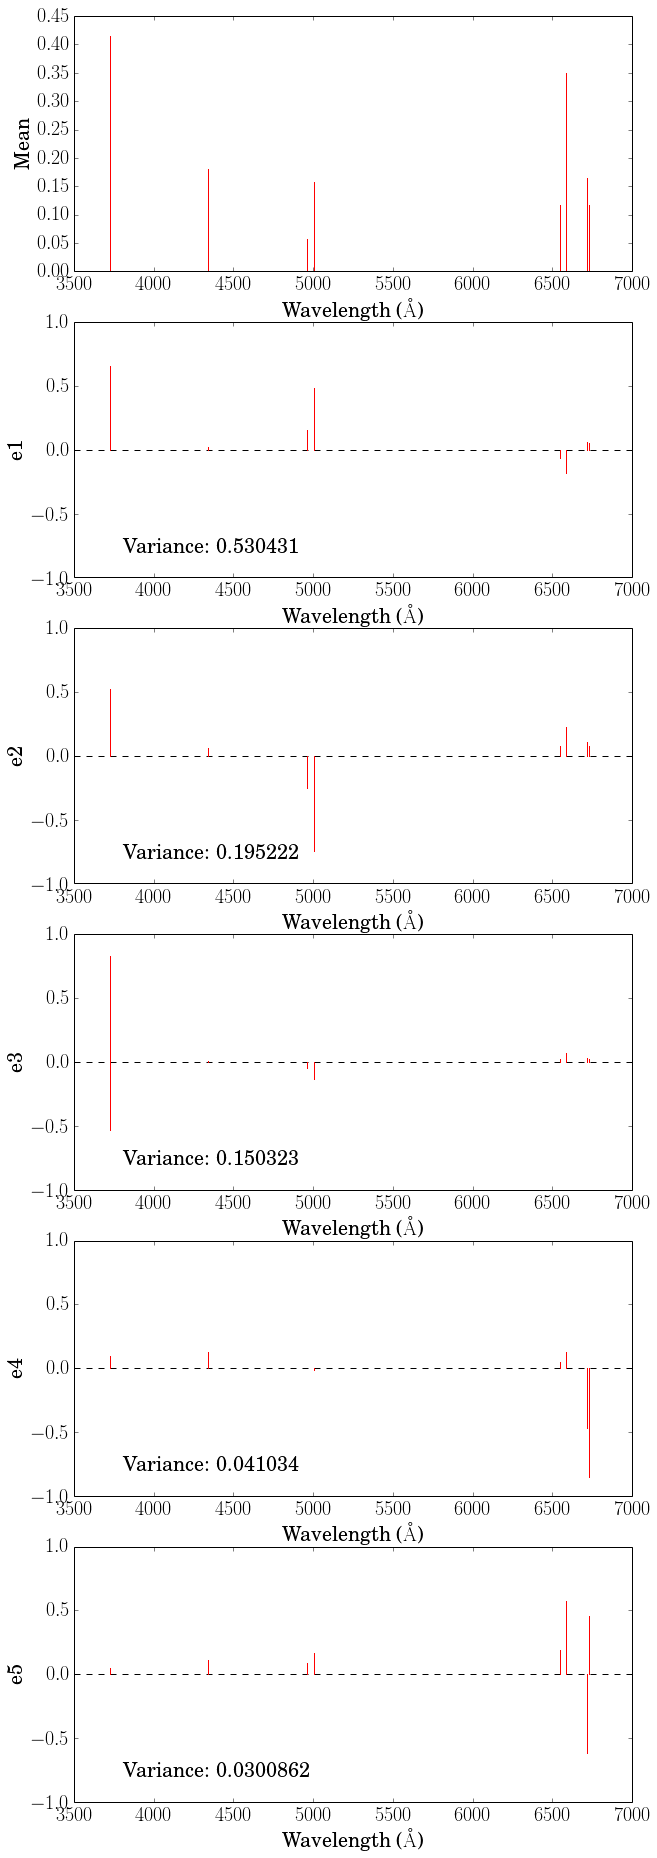

In [4]:
plt.figure(figsize=(10,32))

plt.subplot(611)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('Mean')
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.mean_[ind]], 'r-')
    
plt.subplot(612)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('e1')
plt.text(3800, -0.8, 'Variance: %g' % pca.explained_variance_ratio_[0])
plt.ylim([-1,1])
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.components_[0][ind]], 'r-')
    
plt.subplot(613)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('e2')
plt.text(3800, -0.8, 'Variance: %g' % pca.explained_variance_ratio_[1])
plt.ylim([-1,1])
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.components_[1][ind]], 'r-')
    
plt.subplot(614)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('e3')
plt.text(3800, -0.8, 'Variance: %g' % pca.explained_variance_ratio_[2])
plt.ylim([-1,1])
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.components_[2][ind]], 'r-')
    
plt.subplot(615)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('e4')
plt.text(3800, -0.8, 'Variance: %g' % pca.explained_variance_ratio_[3])
plt.ylim([-1,1])
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.components_[3][ind]], 'r-')
    
plt.subplot(616)
plt.xlabel('Wavelength ($\mathrm{\AA}$)')
plt.ylabel('e5')
plt.text(3800, -0.8, 'Variance: %g' % pca.explained_variance_ratio_[4])
plt.ylim([-1,1])
plt.plot([3500, 7000], [0,0], 'k--')
for ind in np.arange(len(wavelengths)):
    plt.plot([wavelengths[ind], wavelengths[ind]], [0, pca.components_[4][ind]], 'r-')
    
plt.savefig('pca.pdf')

In [5]:
transform = pca.fit_transform(data)

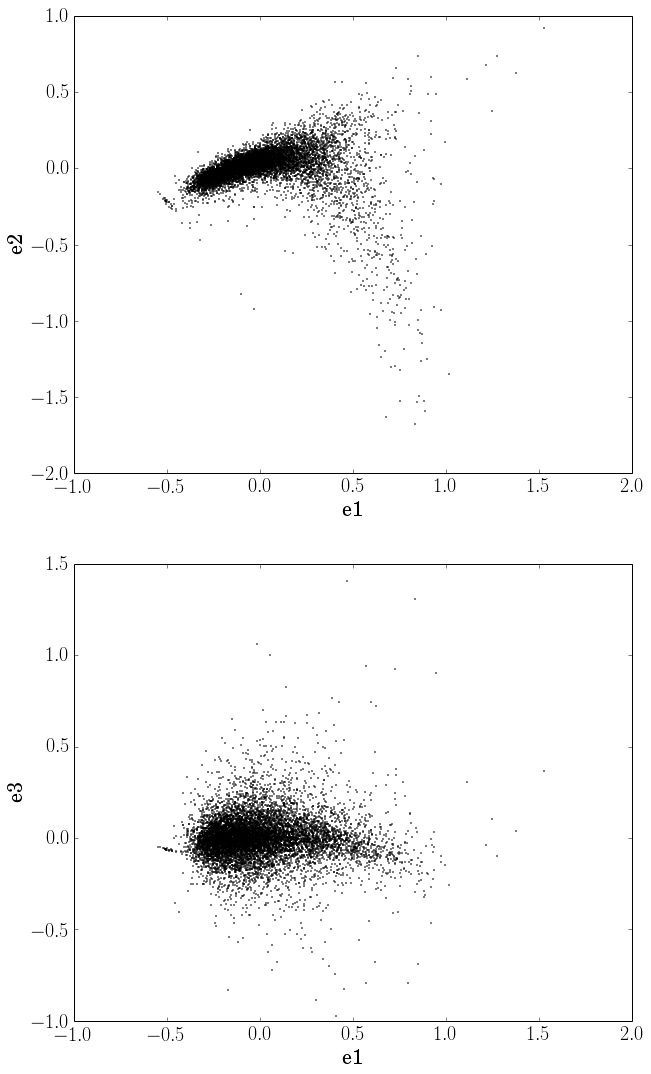

In [6]:
plt.figure(figsize=(10,18))

plt.subplot(211)
plt.plot(transform[:,0], transform[:,1], 'k.', ms=2)
plt.xlabel('e1')
plt.ylabel('e2')

plt.subplot(212)
plt.plot(transform[:,0], transform[:,2], 'k.', ms=2)
plt.xlabel('e1')
plt.ylabel('e3')

Large e1 corresponds to large OII/NII ratio and therefore lower metallicity.
Large e2 corresponds to large OIII/OII ratio and therefore higher excitation.
Tail toward top right of top plot is a tail of vigorously star-forming galaxies with high ionization parameter and low metallicity.

Given the signal to noise cut used here (H$\alpha$ S/N > 25; no other cuts), the data appear to be inherently 2-dimensional, forming a manifold in the space of the first 2 principal components. The third component merely reflects the noisy deblending of the OII doublet and does not provide meaningful information about structure in the space of PCs. 

Loading config parameters from 'local.cfg'
Loading data from parameter 'data_path' = ./data/


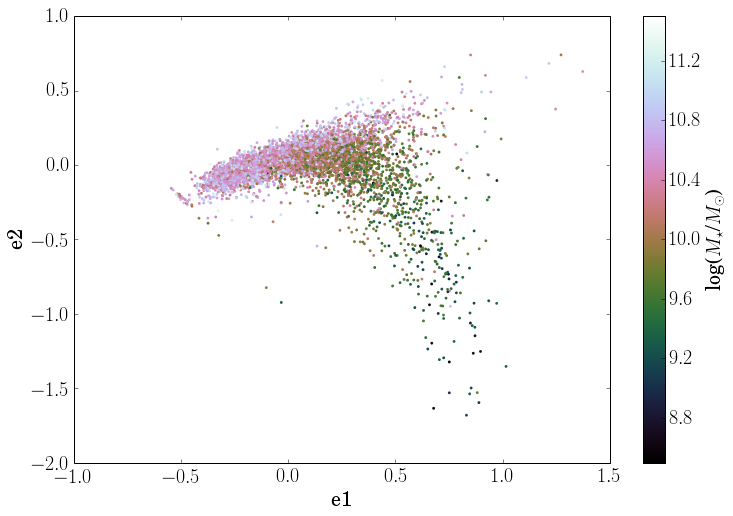

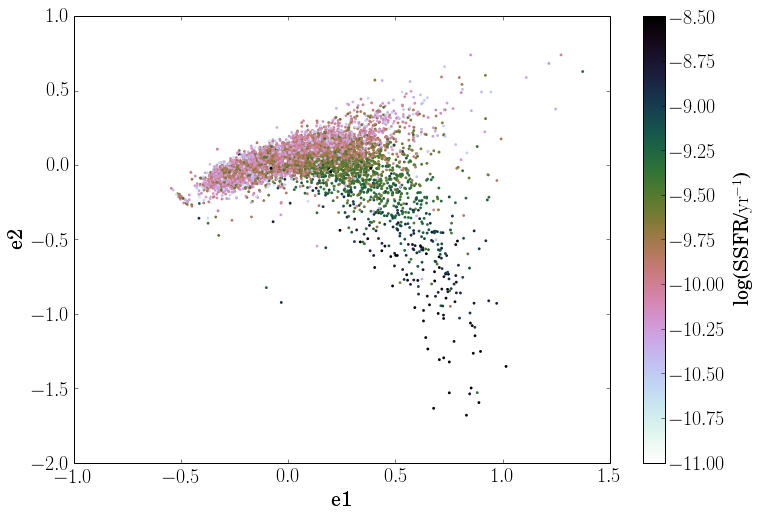

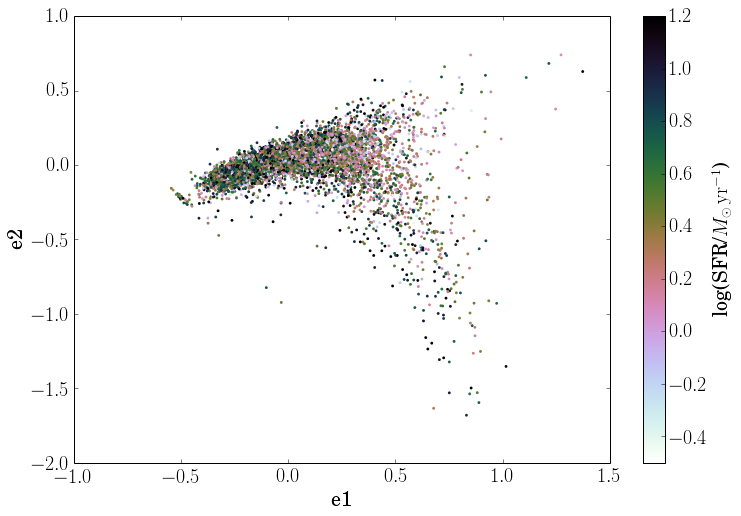

In [7]:
%run get_parameters.py #this requires that get_data_ratios.py is run first; need catalog_indices output from that file.
sample_masses = masses[catalog_indices]
sample_ssfrs = ssfrs[catalog_indices]
sample_sfrs = sfrs[catalog_indices]

from pylab import colorbar

plt.figure(figsize=(12,8))
cm = plt.cm.get_cmap('cubehelix')
plt.scatter(transform[:,0], transform[:,1], c=sample_masses, cmap=cm, s=8, lw=0, vmin=8.5, vmax=11.5)
cb = colorbar()
cb.set_label('log($M_\star$/$M_\odot$)')
plt.xlabel('e1')
plt.ylabel('e2')
plt.xlim([-1.0, 1.5])
plt.ylim([-2.0,1.0])
#plt.title('Distribution of Stellar Masses in PC Space')

plt.savefig('mass_dist.png')


plt.figure(figsize=(12,8))
cm = plt.cm.get_cmap('cubehelix_r')
plt.scatter(transform[:,0], transform[:,1], c=sample_ssfrs, cmap=cm, s=8, lw=0, vmin=-11., vmax=-8.5)
cb = colorbar()
cb.set_label('log(SSFR/$\mathrm{yr}^{-1}$)')
plt.xlabel('e1')
plt.ylabel('e2')
plt.xlim([-1.0, 1.5])
plt.ylim([-2.0,1.0])
#plt.title('Distribution of Specific Star Formation Rates in PC Space')

plt.savefig('ssfr_dist.png')


plt.figure(figsize=(12,8))
cm = plt.cm.get_cmap('cubehelix_r')
plt.scatter(transform[:,0], transform[:,1], c=sample_sfrs, cmap=cm, s=8, lw=0, vmin=-0.5, vmax=1.2)
cb = colorbar()
cb.set_label('log(SFR/$M_\odot \, \mathrm{yr}^{-1}$)')
plt.xlabel('e1')
plt.ylabel('e2')
plt.xlim([-1.0, 1.5])
plt.ylim([-2.0,1.0])
#plt.title('Distribution of Absolute Star Formation Rates in PC Space')

plt.savefig('sfr_dist.png')